In [50]:
import psycopg2
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
conn = psycopg2.connect(database="tcount", user="postgres", password="postgres", host="ec2-54-211-160-10.compute-1.amazonaws.com", port="5432")
cur = conn.cursor()
cur.execute("SELECT Urls, Followers from tweets_large")
records = cur.fetchall()
url_list, follower_list = [], []
for rec in records:
  url_list.append(rec[0])
  follower_list.append(rec[1])
conn.commit()
conn.close()

In [61]:
tuple_list=zip(url_list, follower_list)

In [62]:
tuple_set = set(tuple_list)

In [63]:
tweet_count = []

In [64]:
tuple_set = list(set(tuple_list))

In [65]:
for i in range(len(tuple_set)):
    counter = tuple_list.count(tuple_set[i])
    tweet_count.append(counter)
data = []
for i in range(len(tuple_set)):
    row = tuple_set[i] + (tweet_count[i],)
    data.append(row)

In [66]:
data = sorted(data,key=lambda item: item[1], reverse=True )

In [109]:
data_table = pd.DataFrame(data[:23], columns=['Publisher','Followers', 'Tweets'])

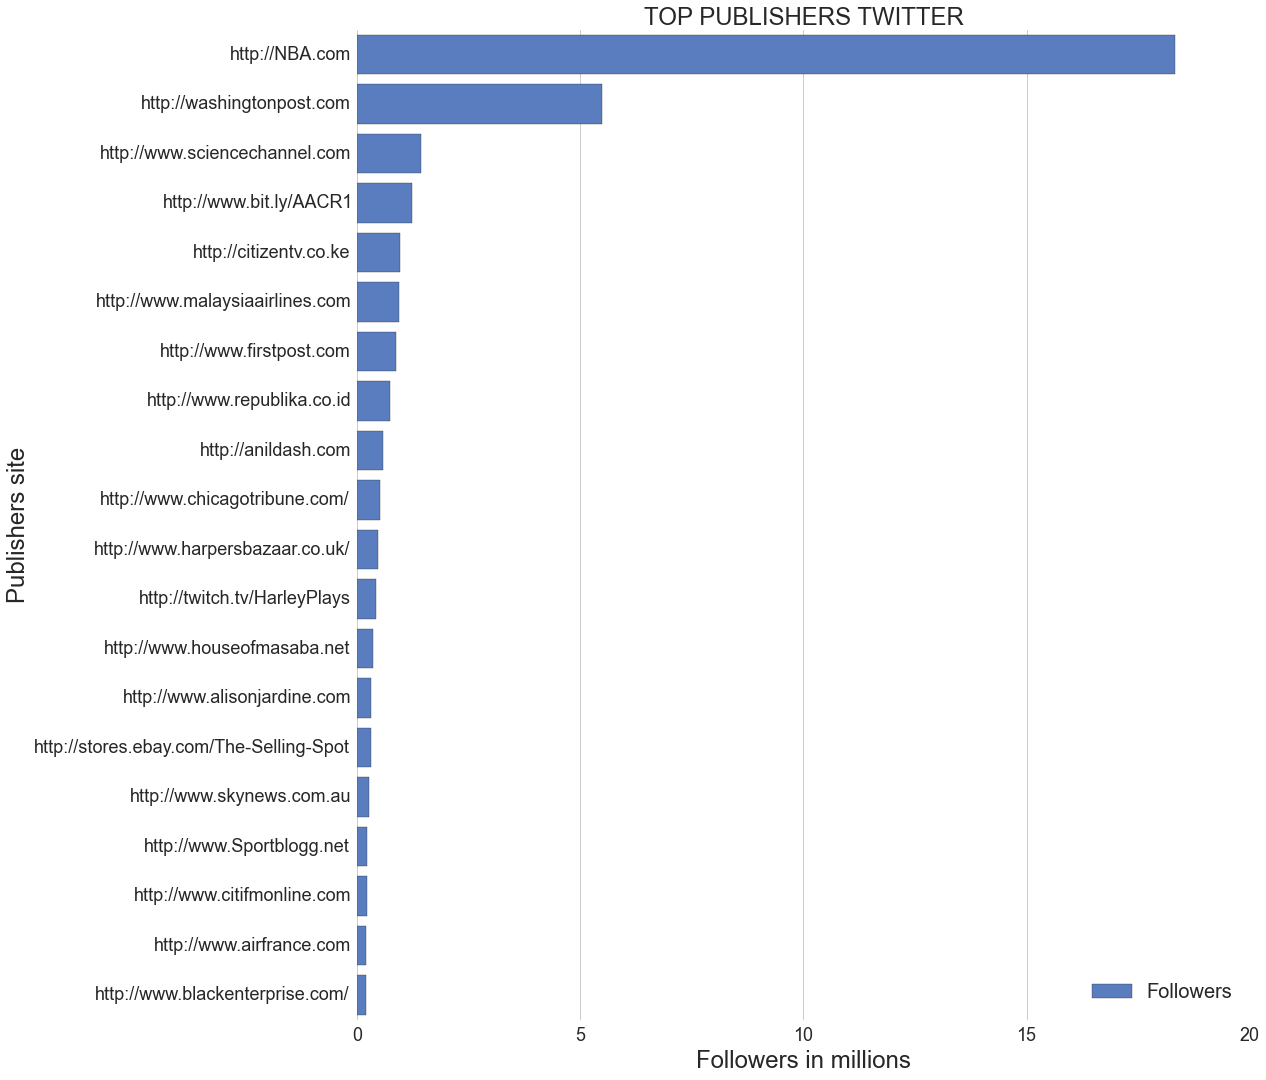

In [139]:
sns.set(style="whitegrid", color_codes=True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Plot the total crashes
sns.set_color_codes("muted")
p=sns.barplot(x="Followers", y="Publisher", data=data_table,
            label="Followers", color="b")

# Plot 
##sns.set_color_codes("muted")
##sns.countplot(y="Publisher", data=data_table, label="Tweets", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Followers and Tweets")
sns.despine(left=True, bottom=True)
sns.axes_style()
sns.set_style("darkgrid", {"axes.facecolor": ".9","axes.labelcolor": '.15' })
sns.set(font_scale=2)  # crazy big
plt.xlabel('Followers', fontsize=18)
plt.ylabel('Publishers', fontsize=18)
ax.plot(x="Followers", y="Publishers", marker='s', linestyle='none')
plt.tick_params(axis="both", labelsize=18)
plt.legend(loc='lower right',fontsize=20)
plt.xticks([0, 5000000, 10000000, 15000000, 20000000])
plt.xticks(p.get_xticks(), p.get_xticks() /1000000)
plt.xlabel('Followers in millions', fontsize=24)
plt.ylabel('Publishers site', fontsize=24)
plt.subplots_adjust(top=1.5)
sns.plt.title('TOP PUBLISHERS TWITTER')